In [2]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Historical Trade Tweets/JustinBlackmon_Trans_1.csv"

#Establish pd dataframe for each file
justinblackmon1 = pd.read_csv(csv_path1, sep=";", error_bad_lines=False)

#concatenate data frames 
justinblackmon_master = pd.concat([justinblackmon1])
justinblackmon_master

b'Skipping line 1843: expected 10 fields, saw 11\nSkipping line 1847: expected 10 fields, saw 11\nSkipping line 4768: expected 10 fields, saw 11\nSkipping line 8373: expected 10 fields, saw 11\nSkipping line 14550: expected 10 fields, saw 11\nSkipping line 19713: expected 10 fields, saw 11\nSkipping line 19982: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2012-05-02 18:27,0,0,Second was Justin Blackmon,NaN,NaN,NaN,1.978297e+17,https://twitter.com/TopFlight_/status/19782967...
1,NaN,2012-05-02 18:08,0,0,Added @ floyd3 @ JustBlack81 Brian Quick @M0SA...,NaN,@ @ @M0SAnu @,NaN,1.978250e+17,https://twitter.com/HarbingerFF/status/1978249...
2,NaN,2012-05-02 17:55,0,0,RT @ shannsharrelson: RT @ MyTeamTeal: # Jagua...,NaN,@ @ @,#,1.978217e+17,https://twitter.com/keithshoe/status/197821715...
3,NaN,2012-05-02 17:53,0,0,@ndy_willis @ chukwu77 @b14ckmon @ JustBlack81...,NaN,@ndy_willis @ @b14ckmon @,NaN,1.978210e+17,https://twitter.com/McCrarySig/status/19782101...
4,NaN,2012-05-02 17:46,0,0,@ JarrettBrownQB Throwing to Justin Blackmon.....,NaN,@,#,1.978194e+17,https://twitter.com/Windy10391/status/19781943...
5,NaN,2012-05-02 17:37,0,0,@ TFish_Jax @ JohnOehser @ JustinWendel904 @ j...,NaN,@ @ @ @,NaN,1.978171e+17,https://twitter.com/samkouvaris/status/1978170...
6,NaN,2012-05-02 17:25,1,1,# Jaguars Coach Cullen: Says move up to get @ ...,NaN,@,#,1.978141e+17,https://twitter.com/MyTeamTeal/status/19781406...
7,NaN,2012-05-02 17:12,1,0,my dude @ JustBlack81 account is now verfied #...,NaN,@,#,1.978108e+17,https://twitter.com/Fully__Laced/status/197810...
8,NaN,2012-05-02 17:08,0,0,@ Braydenstringer # YGH @ JustBlack81 @AimeeCo...,NaN,@ @ @AimeeComerford @ @ @bigherrm4,#,1.978097e+17,https://twitter.com/JordanCowherd/status/19780...
9,NaN,2012-05-02 17:04,0,0,Look what I found on @ eBay! 2012 Press Pass J...,NaN,@,#3,1.978089e+17,https://twitter.com/tandhsportscard/status/197...


In [3]:
#fillna's with text to fix error
justinblackmon_master["text"].fillna("text", inplace=True)
justinblackmon_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2012-05-02 18:27,0,0,Second was Justin Blackmon,NaN,NaN,NaN,1.978297e+17,https://twitter.com/TopFlight_/status/19782967...
1,NaN,2012-05-02 18:08,0,0,Added @ floyd3 @ JustBlack81 Brian Quick @M0SA...,NaN,@ @ @M0SAnu @,NaN,1.978250e+17,https://twitter.com/HarbingerFF/status/1978249...
2,NaN,2012-05-02 17:55,0,0,RT @ shannsharrelson: RT @ MyTeamTeal: # Jagua...,NaN,@ @ @,#,1.978217e+17,https://twitter.com/keithshoe/status/197821715...
3,NaN,2012-05-02 17:53,0,0,@ndy_willis @ chukwu77 @b14ckmon @ JustBlack81...,NaN,@ndy_willis @ @b14ckmon @,NaN,1.978210e+17,https://twitter.com/McCrarySig/status/19782101...
4,NaN,2012-05-02 17:46,0,0,@ JarrettBrownQB Throwing to Justin Blackmon.....,NaN,@,#,1.978194e+17,https://twitter.com/Windy10391/status/19781943...


In [4]:
#create list of sentiment scores associated with tweets about relevant player

justinblackmon_sent = []

tweets = justinblackmon_master["text"]

for index,tweet in justinblackmon_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    justinblackmon_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
justinblackmon_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-05-02 18:27'},
 {'Compound': 0.2023,
  'Negative': 0.886,
  'Neutral': 0.0,
  'Positive': 0.114,
  'date': '2012-05-02 18:08'},
 {'Compound': -0.2732,
  'Negative': 0.723,
  'Neutral': 0.183,
  'Positive': 0.094,
  'date': '2012-05-02 17:55'},
 {'Compound': 0.3382,
  'Negative': 0.626,
  'Neutral': 0.0,
  'Positive': 0.374,
  'date': '2012-05-02 17:53'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-05-02 17:46'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-05-02 17:37'},
 {'Compound': 0.4767,
  'Negative': 0.584,
  'Neutral': 0.167,
  'Positive': 0.249,
  'date': '2012-05-02 17:25'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-05-02 17:12'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2012-05-02 17:08'},
 {'Compound':

In [5]:
# Convert player sentiments to DataFrame
JB_pd = pd.DataFrame.from_dict(justinblackmon_sent)
JB_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2012-05-02 18:27
1,0.2023,0.886,0.000,0.114,2012-05-02 18:08
2,-0.2732,0.723,0.183,0.094,2012-05-02 17:55
3,0.3382,0.626,0.000,0.374,2012-05-02 17:53
4,0.0000,1.000,0.000,0.000,2012-05-02 17:46


In [6]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(justinblackmon_master, JB_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2012-05-02 18:27,0,0,Second was Justin Blackmon,NaN,NaN,NaN,1.978297e+17,https://twitter.com/TopFlight_/status/19782967...,0.0000,1.000,0.000,0.000
1,NaN,2012-05-02 18:08,0,0,Added @ floyd3 @ JustBlack81 Brian Quick @M0SA...,NaN,@ @ @M0SAnu @,NaN,1.978250e+17,https://twitter.com/HarbingerFF/status/1978249...,0.2023,0.886,0.000,0.114
2,NaN,2012-05-02 17:55,0,0,RT @ shannsharrelson: RT @ MyTeamTeal: # Jagua...,NaN,@ @ @,#,1.978217e+17,https://twitter.com/keithshoe/status/197821715...,-0.2732,0.723,0.183,0.094
3,NaN,2012-05-02 17:53,0,0,@ndy_willis @ chukwu77 @b14ckmon @ JustBlack81...,NaN,@ndy_willis @ @b14ckmon @,NaN,1.978210e+17,https://twitter.com/McCrarySig/status/19782101...,0.3382,0.626,0.000,0.374
4,NaN,2012-05-02 17:46,0,0,@ JarrettBrownQB Throwing to Justin Blackmon.....,NaN,@,#,1.978194e+17,https://twitter.com/Windy10391/status/19781943...,0.0000,1.000,0.000,0.000


In [7]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2012-05-02 18:27,0,0,Second was Justin Blackmon,NaN,NaN,NaN,1.978297e+17,https://twitter.com/TopFlight_/status/19782967...,0.0000,1.000,0.000,0.000,2012-05-02
1,NaN,2012-05-02 18:08,0,0,Added @ floyd3 @ JustBlack81 Brian Quick @M0SA...,NaN,@ @ @M0SAnu @,NaN,1.978250e+17,https://twitter.com/HarbingerFF/status/1978249...,0.2023,0.886,0.000,0.114,2012-05-02
2,NaN,2012-05-02 17:55,0,0,RT @ shannsharrelson: RT @ MyTeamTeal: # Jagua...,NaN,@ @ @,#,1.978217e+17,https://twitter.com/keithshoe/status/197821715...,-0.2732,0.723,0.183,0.094,2012-05-02
3,NaN,2012-05-02 17:53,0,0,@ndy_willis @ chukwu77 @b14ckmon @ JustBlack81...,NaN,@ndy_willis @ @b14ckmon @,NaN,1.978210e+17,https://twitter.com/McCrarySig/status/19782101...,0.3382,0.626,0.000,0.374,2012-05-02
4,NaN,2012-05-02 17:46,0,0,@ JarrettBrownQB Throwing to Justin Blackmon.....,NaN,@,#,1.978194e+17,https://twitter.com/Windy10391/status/19781943...,0.0000,1.000,0.000,0.000,2012-05-02


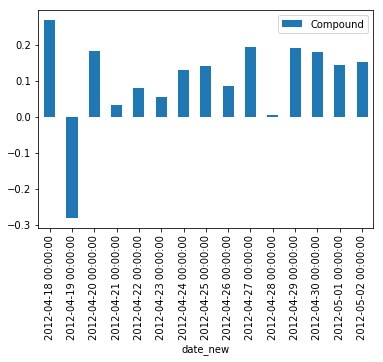

In [8]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('justinblackmon.png')
plt.show()
